In [1]:
library(tidyverse)
library(data.table)
library(dplyr)
library(stringr)
library(readr)
library(tidyverse)
library(RcppParallel)
library(quanteda)
library(janeaustenr)
library(dplyr)
library(tidyr)
library(tidytext)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.4.2     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.1
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: 'data.table'


The following objects are masked from 'package:lubridate':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from 'package:dplyr':

    between, first, last


The following object is masked from 'package:purrr':

    transpose


Package version: 3.3.0
Unicode version: 15.1
ICU version: 74.1

Parallel computing: 20 of 20 threads used.

See https://quanteda.io for tutori

In [2]:
twitter_csv <- fread("UBC-ISD.csv", encoding="UTF-8")

In [6]:
terms <- c('fuck', 'dirty', 'stupid', 'idiot', 'asshole', 'bastard', 'nasty', 'whore', 'slut', 'skank', 'cunt', 'bitch', 'motherfucker', 'go to hell', 'wimp', 'coward', 'moron', 'traitor', 'shut up', 'shut the fuck up', 'stfu', 'piece of shit', 'ignorant', 'clown', 'ccpvirus', 'chinese coronavirus', 'chinavirus', 'china virus', 'fuckchina', 'nukechina', 'bombchina', 'deathtochina', 'chinesevirus', 'fake lab wuhan', 'china weapon', 'china bioweapon', 'zionazi', 'Soros virus', 'blood libel', 'nwovirus', 'new world order', 'sacrifice children', 'jew world order', 'liar', 'yellow star', 'israel virus', 'israelvirus', 'rothschild covid', 'kalergi plan', 'jail', 'locked up', 'evil.', 'is evil', 'so evil', 'pure evil', 'an evil', 'evil wom', 'evil man', 'evil witch', 'is evil', 'are evil', 'that evil', 'very evil', 'tyrant', 'tyranny', 'dictator', 'tv doctor', 'twitter doctor', 'murder', 'murderer', 'eugenic', 'satan', 'Nazi', 'non-human', 'sterile', 'slave', 'crooked', 'corrupt', 'shill', 'liar', 'lying', 'killer', 'fraud', 'big pharma', 'pharma puppet', 'Nuremberg', 'crimes against humanity', 'genocide', 'child abuse', 'covid hoax', 'covid fake', 'virus hoax', 'gates virus', 'bioweapon', 'secret elite', 'depopulation', 'save our children', 'scamdemic', 'plandemic')
terms <- paste0(" ", terms)

In [7]:
terms

[1] " fuck"                    " dirty"                  
 [3] " stupid"                  " idiot"                  
 [5] " asshole"                 " bastard"                
 [7] " nasty"                   " whore"                  
 [9] " slut"                    " skank"                  
[11] " cunt"                    " bitch"                  
[13] " motherfucker"            " go to hell"             
[15] " wimp"                    " coward"                 
[17] " moron"                   " traitor"                
[19] " shut up"                 " shut the fuck up"       
[21] " stfu"                    " piece of shit"          
[23] " ignorant"                " clown"                  
[25] " ccpvirus"                " chinese coronavirus"    
[27] " chinavirus"              " china virus"            
[29] " fuckchina"               " nukechina"              
[31] " bombchina"               " deathtochina"           
[33] " chinesevirus"            " fake lab wuhan"         
[35] " china weapon"            " china bioweapon"        
[37] " zionazi"                 " Soros virus"            
[39] " blood libel"             " nwovirus"               
[41] " new world order"         " sacrifice children"     
[43] " jew world order"         " liar"                   
[45] " yellow star"             " israel virus"           
[47] " israelvirus"             " rothschild covid"       
[49] " kalergi plan"            " jail"                   
[51] " locked up"               " evil."                  
[53] " is evil"                 " so evil"                
[55] " pure evil"               " an evil"                
[57] " evil wom"                " evil man"               
[59] " evil witch"              " is evil"                
[61] " are evil"                " that evil"              
[63] " very evil"               " tyrant"                 
[65] " tyranny"                 " dictator"               
[67] " tv doctor"               " twitter doctor"         
[69] " murder"                  " murderer"               
[71] " eugenic"                 " satan"                  
[73] " Nazi"                    " non-human"              
[75] " sterile"                 " slave"                  
[77] " crooked"                 " corrupt"                
[79] " shill"                   " liar"                   
[81] " lying"                   " killer"                 
[83] " fraud"                   " big pharma"             
[85] " pharma puppet"           " Nuremberg"              
[87] " crimes against humanity" " genocide"               
[89] " child abuse"             " covid hoax"             
[91] " covid fake"              " virus hoax"             
[93] " gates virus"             " bioweapon"              
[95] " secret elite"            " depopulation"           
[97] " save our children"       " scamdemic"              
[99] " plandemic"

In [8]:

twitter_data <- twitter_csv |>
select(starts_with("twitter"))

colnames(twitter_data) <- str_replace(colnames(twitter_data), "twitter.tweet/", "")
colnames(twitter_data) <- str_replace(colnames(twitter_data), "twitter.user/", "")


colnames(twitter_data)

[1] "contributors"        "created"             "favouriteCount"     
 [4] "favourited"          "hashtags"            "id"                 
 [7] "inReplyToScreenName" "inReplyToStatusID"   "inReplyToUserID"    
[10] "isQuote"             "lang"                "latitude"           
[13] "longitude"           "mediaTypes"          "mediaUrls"          
[16] "mentionIds"          "mentions"            "originalText"       
[19] "place"               "placeName"           "possiblySensitive"  
[22] "quotedStatusId"      "retweetCount"        "source"             
[25] "text"                "truncated"           "url"                
[28] "urls"                "contributorsEnabled" "createdAt"          
[31] "description"         "favouritesCount"     "followersCount"     
[34] "friendsCount"        "geoEnabled"          "id"                 
[37] "isTranslator"        "lang"                "listedCount"        
[40] "location"            "name"                "protectedTweets"    
[43] "screenName"          "statusesCount"       "timezone"           
[46] "url"                 "utcOffset"           "verified"

In [9]:
twitter_info<- twitter_data |>
select("text", "created")

In [10]:
pattern <- paste(terms, collapse = "|")

twitter_info <- twitter_info |>
  mutate(negative = as.integer(grepl(pattern, text, ignore.case = TRUE)))

In [11]:
twitter_info

text,created,negative
<chr>,<dttm>,<int>
@PattyHajdu But astra zenica is a one dose vaccine! #cdnpoli,2021-05-04 11:32:15,0
I agree with <U+2066>@picardonhealth<U+2069> that most deaths from Covid in long-term care were preventable and that we urgently need an actionable plan. https://t.co/g8CYG63yuw,2021-05-04 11:32:15,0
"This is how you do it, @COVIDSciOntario @DrJoshuaTepper",2021-06-27 11:34:16,0
@shandro Shit it. People have a right to freedom I. This country you commie.,2021-05-04 11:29:09,0
"This is how you do it, @COVIDSciOntario @DrJoshuaTepper https://t.co/0T6dYvPf7y",2021-06-27 11:34:16,0
Ongoing staffing crises continue to limit family access in #LTC. This is simply wrong @RodPhillips01. Amend the guidelines. Grant all fully vaccinated family members indoor & outdoor access to residents. No scheduling. No supervision. Only masking necessary at this point.,2021-06-27 11:56:14,0
[ON] <U+2728><U+2728>DOWNSVIEW ARENA TODAY<U+2728><U+2728> <U+0001F4CD>1633 Wilson Ave <U+0001F5D3><U+FE0F>June 27 (10am-6pm) <U+2611><U+FE0F>1st dose 12+ all M postals <U+2611><U+FE0F>2nd dose 12+ live/work/school in PRIORITY POSTALS Check poster carefully for details! https://t.co/NPDVg3PI07 #VHCDose2 #COVID19ON #vhcON,2021-06-27 11:56:17,0
"<U+0001F447><U+0001F3FB><U+0001F447><U+0001F3FB><U+0001F447><U+0001F3FB>This is a real problem with the way the media is covering breakthrough infections. For the vast majority of people, they are transient, asymptomatic, and not associated with onward transmission.",2021-06-30 17:21:31,0
"There have been a lot of… thoughts about NACI’s statement on “preferred vaccines” today. Many feel angry/bewildered/tricked/confused/all of the above. I get it. I still stand by this thread. As my friend @ASPphysician has said, not much has changed. Let me elaborate... 1/n https://t.co/ocstOMT5jq",2021-05-04 11:29:18,0


In [1]:
extract_hashtags <- function(x) {
  hashtags <- str_extract_all(x, "#\\S+")
  return(unlist(hashtags))
}

In [3]:
library(tidyverse)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.4.2     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.1
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [4]:
twitter_info <- twitter_info |>
  mutate(hashtags = lapply(text, extract_hashtags))|>
  unnest(hashtags)|>
  mutate(hashtags = str_replace_all(hashtags, "\\.$", ""))|>
  filter(hashtags != "character(0)")

ERROR: Error in mutate(twitter_info, hashtags = lapply(text, extract_hashtags)): object 'twitter_info' not found


In [13]:
twitter_graphing <- twitter_info |>
select(created, negative)|>
mutate(created = round_date(created, unit = "day"))|>
group_by(created)|>
summarise(freq = n())|>
ungroup()

In [84]:
twitter_graphing

created,freq
<dttm>,<int>
2021-04-27,25949
2021-04-28,56977
2021-04-29,69905
2021-04-30,47651
2021-05-01,46956
2021-05-02,44181
2021-05-03,40726
2021-05-04,47051
2021-05-05,24930


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


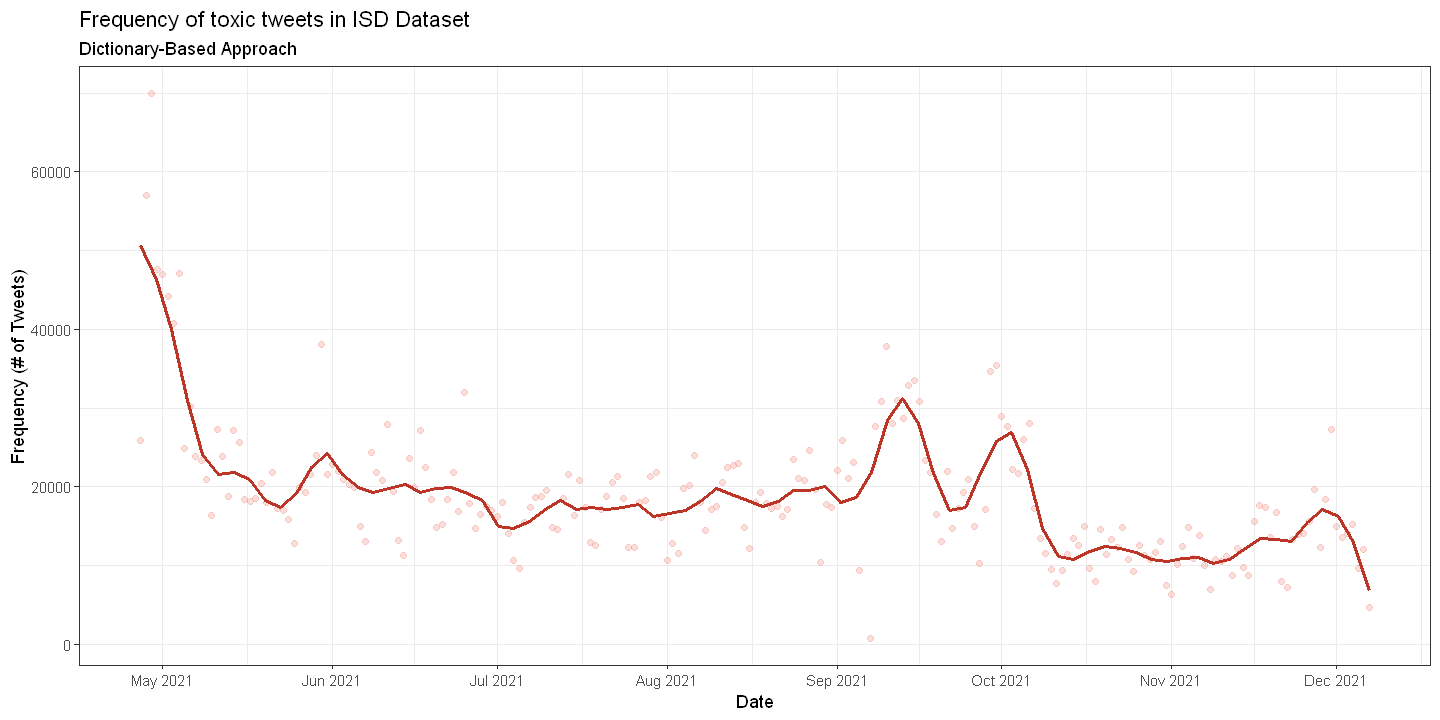

In [20]:
options(repr.plot.width=12, repr.plot.height=6) 

graph <- twitter_graphing|>
    ggplot(aes(x=created, y=freq))+geom_point(alpha=0.3, color="#f08f84")+
    geom_smooth(aes(), span=0.1, method="loess", se=FALSE, size=1, color="#bd3526")+
    scale_x_datetime(date_breaks = "1 month", date_labels = "%b %Y")+
    theme(aspect.ratio=1/2, axis.text.x = element_text(angle=45, hjust = 1))+
    theme_bw()+
    labs(
        title="Frequency of toxic tweets in ISD Dataset", 
       subtitle="Dictionary-Based Approach",
       y="Frequency (# of Tweets)", 
       x="Date",
       color=NULL
       )
graph

ggsave("toxic_tweets_dictionary_span.png", width=10, height=5)